### Importación de datos



In [18]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [19]:
tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

In [20]:
ingresos_totales = {}

for nombre, df in tiendas.items():
    ingresos_totales[nombre] = df["Precio"].sum()

ingresos_totales


{'Tienda 1': np.float64(1150880400.0),
 'Tienda 2': np.float64(1116343500.0),
 'Tienda 3': np.float64(1098019600.0),
 'Tienda 4': np.float64(1038375700.0)}

# 2. Ventas por categoría

In [21]:
ventas_categoria = {}

for nombre, df in tiendas.items():
    ventas_categoria[nombre] = (
        df.groupby("Categoría del Producto")
          .size()
          .sort_values(ascending=False)
    )

ventas_categoria

{'Tienda 1': Categoría del Producto
 Muebles                    465
 Electrónicos               448
 Juguetes                   324
 Electrodomésticos          312
 Deportes y diversión       284
 Instrumentos musicales     182
 Libros                     173
 Artículos para el hogar    171
 dtype: int64,
 'Tienda 2': Categoría del Producto
 Muebles                    442
 Electrónicos               422
 Juguetes                   313
 Electrodomésticos          305
 Deportes y diversión       275
 Instrumentos musicales     224
 Libros                     197
 Artículos para el hogar    181
 dtype: int64,
 'Tienda 3': Categoría del Producto
 Muebles                    499
 Electrónicos               451
 Juguetes                   315
 Electrodomésticos          278
 Deportes y diversión       277
 Libros                     185
 Artículos para el hogar    177
 Instrumentos musicales     177
 dtype: int64,
 'Tienda 4': Categoría del Producto
 Muebles                    480
 Electrónic

# 3. Calificación promedio de la tienda


In [22]:
calificaciones_promedio = {}

for nombre, df in tiendas.items():
    calificaciones_promedio[nombre] = df["Calificación"].mean()

calificaciones_promedio


{'Tienda 1': np.float64(3.976685036032217),
 'Tienda 2': np.float64(4.037303942348453),
 'Tienda 3': np.float64(4.048325561678677),
 'Tienda 4': np.float64(3.9957591178965224)}

# 4. Productos más y menos vendidos

In [23]:
productos_populares = {}

for nombre, df in tiendas.items():
    conteo = df["Producto"].value_counts()

    productos_populares[nombre] = {
        "Más vendido": conteo.index[0],
        "Menos vendido": conteo.index[-1]
    }

productos_populares


{'Tienda 1': {'Más vendido': 'Microondas', 'Menos vendido': 'Celular ABXY'},
 'Tienda 2': {'Más vendido': 'Iniciando en programación',
  'Menos vendido': 'Juego de mesa'},
 'Tienda 3': {'Más vendido': 'Kit de bancas',
  'Menos vendido': 'Bloques de construcción'},
 'Tienda 4': {'Más vendido': 'Cama box',
  'Menos vendido': 'Guitarra eléctrica'}}

In [24]:
envio_promedio = {}

for nombre, df in tiendas.items():
    envio_promedio[nombre] = df["Costo de envío"].mean()

envio_promedio


{'Tienda 1': np.float64(26018.60958033065),
 'Tienda 2': np.float64(25216.235693090293),
 'Tienda 3': np.float64(24805.680373039424),
 'Tienda 4': np.float64(23459.457167090754)}

# 5. Envío promedio por tienda

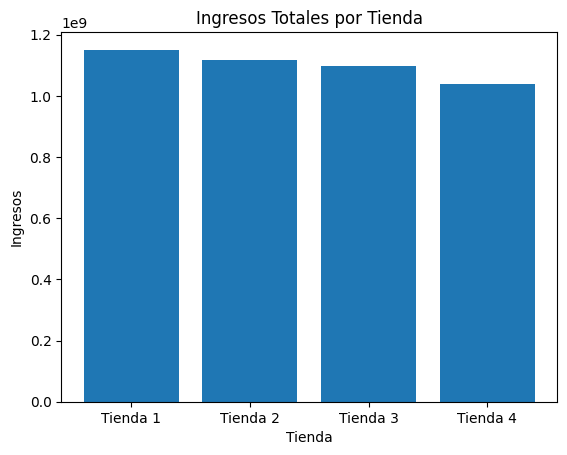

In [25]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(ingresos_totales.keys(), ingresos_totales.values())
plt.title("Ingresos Totales por Tienda")
plt.xlabel("Tienda")
plt.ylabel("Ingresos")
plt.show()


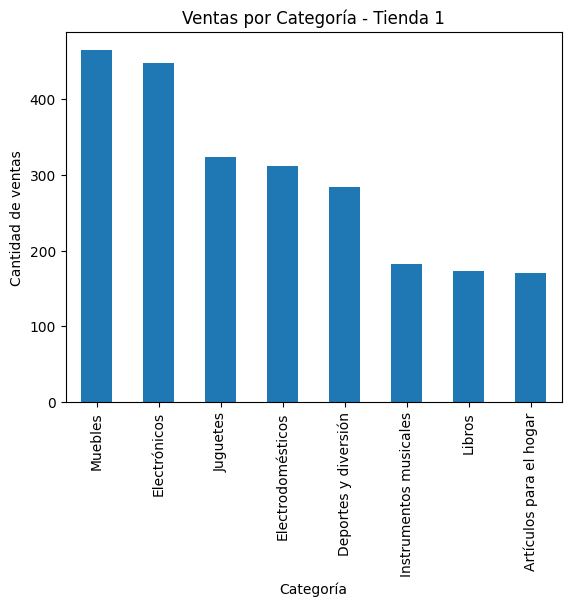

In [26]:
tienda_top = max(ingresos_totales, key=ingresos_totales.get)

ventas_categoria[tienda_top].plot(kind="bar")
plt.title(f"Ventas por Categoría - {tienda_top}")
plt.xlabel("Categoría")
plt.ylabel("Cantidad de ventas")
plt.show()


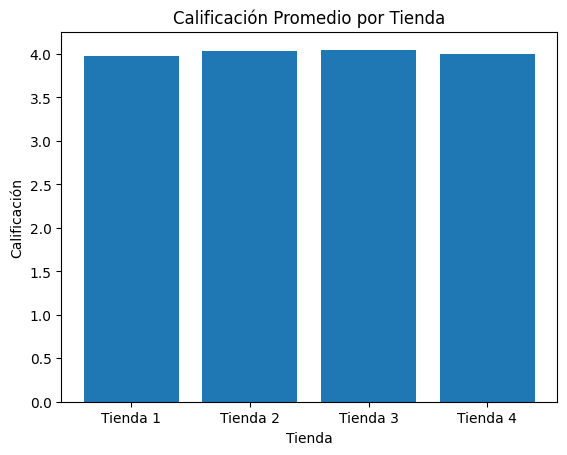

In [27]:
plt.figure()
plt.bar(calificaciones_promedio.keys(), calificaciones_promedio.values())
plt.title("Calificación Promedio por Tienda")
plt.xlabel("Tienda")
plt.ylabel("Calificación")
plt.show()
